# Now lets discuss other options for getting the model performance

### We have already discussed Accuracy

- But for classification problems this is not a really good metric because it gives fraction of correctly classified samples.

- Let's take a spam classification problem where 99% of the correct and just 1% is spam in our training set.

- Now thats called as class imbalance problem.

- Now i have build a model which would end up classifying all the samples as ham.

- Now 99/100 samples were correctly classified and 1/100 was misclassified and therefore  the model is <b> 99% </b> accurate.

- But this may even be a failed classifier because it did not find out spam -> so purpose is defeated and thus its a failed classifier if you want to fish out spam.

- This is why we resort to a much eloborate method of model performance summarization.


We use a concept called Confusion Matrix

![confusion Matrix](confusion_matrix.png)

There a few important things we need to know frm the confusion matrix

1. The class of interest from predictions side is termed as positive - in the above example spams.
2. thats why the first column is positives.
3. Correct ones are True and wrong predictions are False.
4. These must be sufficient to calculate and term the confusion matrix.


Therefore accuracy is 

![accuracy formula](accuracy.png)

The other important metrics are.

![Other metrics](other_metrics.png)

Now lets put it all in laymans terms before calculating them on our examples.

 Accuracy  - How much I got correctly - true ones out of all.<br>
 Precision - How much are truly spam/cancer/hiv correctly said out of all I said as spam/cancer/hiv.<br>
 Recall    - How much are truly spam/cancer/hiv correctly said out of all which had spam/cancer/hiv.
 
Intutions

High Precision -> Our classifier has very less false positives.(Saying you have hiv to a man with no hiv)<br>
High Recall    -> Our classifier had very less false negatives.(Saying you dont have hiv to a man with hiv)

<br>
F1 Score -> is a harmonic mean of precision and recall

### The Following imports are required to pop up the confusion matrix

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
import os
os.getcwd()

'/media/Datascience/Projects/Giridhar/Supervised Learning Training 101'

In [9]:
os.listdir('/media/Datascience/Projects/Giridhar/Datasets/pima-indians-diabetes-database')

['diabetes.csv']

In [10]:
df = pd.read_csv('/media/Datascience/Projects/Giridhar/Datasets/pima-indians-diabetes-database/diabetes.csv')

# dataset can be found at: 
[link](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.iloc[:,range(0,8)].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
df.iloc[:,[-1]].head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [24]:
X = df.iloc[:,range(0,8)].values
X.shape

(768, 8)

In [25]:
y = df.iloc[:,[-1]].values
print(y.shape)
print(type(y))

(768, 1)
<class 'numpy.ndarray'>


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42, stratify = y)

In [27]:
knn = KNeighborsClassifier(n_neighbors=6)

In [28]:
knn.fit(X_train,y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [29]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  28]
 [ 57  50]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       201
           1       0.64      0.47      0.54       107

   micro avg       0.72      0.72      0.72       308
   macro avg       0.70      0.66      0.67       308
weighted avg       0.71      0.72      0.71       308



In [30]:
# Unstratified report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Jumping on to the logistic regression

### Despite the name logistic regression is a technique used in classification problems not a regression problem.

Lets see how log-reg works for binary classification

- The logistic regression has a linear decision boundary
- Log reg gives a probablity score as the output
- Mostly we use 0.5 as the threshold for prob score - > 0.5 means true < 0.5 means false
- Below we will see a program

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_tr, X_te, y_tr, y_te = train_test_split(X,y,random_state = 42, test_size = 0.4)

logreg.fit(X_tr, y_tr)

y_pred = logreg.predict(X_te)

Now what happens if we vary the threshold

If the threshold is 0
the model predicts all samples as true
![Threshold = 0](logreg1.png)

reverse for 1
the various intermediate value of threshold gives a range of values for FP and TP this curve is called as ROC Curve
Receiver Operating Characteristic Curve

![ROC](roc.png)

Lets see how we do it

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_te)[:,1] # predict proba gives probablity rather than the value

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr, 'logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log Reg ROC Curve')
plt.show()

## Building a logistic regression model
Time to build your first logistic regression model! 
scikit-learn makes it very easy to try different models, 
since the Train-Test-Split/Instantiate/Fit/Predict paradigm 
applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. 
You'll see this now for yourself as you train a logistic regression model 
on exactly the same data as in the previous exercise. 
Will it outperform k-NN? There's only one way to find out!

In [1]:
import os
os.getcwd()

'/media/Datascience/Projects/Giridhar/Supervised Learning Training 101'

In [2]:
os.listdir('/media/Datascience/Projects/Giridhar/Datasets/pima-indians-diabetes-database')

['diabetes.csv']

In [4]:
import pandas as pd
df = pd.read_csv('/media/Datascience/Projects/Giridhar/Datasets/pima-indians-diabetes-database/diabetes.csv')

In [5]:
X = df.iloc[:,range(0,8)].values
y = df.iloc[:,[-1]].values

In [7]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[175  31]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.68      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



/home/gg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ROC Curve

Classification reports and confusion matrices are great methods <br>
to quantitatively evaluate model performance, while ROC curves <br>
provide a way to visually evaluate models. <br>

most classifiers in scikit-learn have a .predict_proba() method  <br>
which returns the probability of a given sample being in a particular class.  <br>

now evaluate its performance by plotting an ROC curve. <br>

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

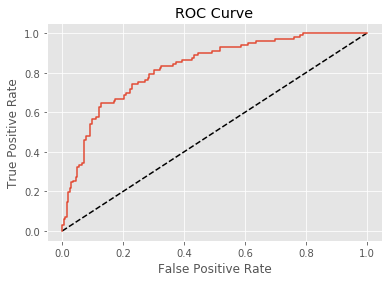

In [12]:
# Import necessary modules
from sklearn.metrics import  roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds.

## Uses of ROC Curve

- How to do model selection using ROC Curve
- Can we deduce a metric of interest from this curve
- Thats where the Area Under Curve (AUC) can be used
- Lets consider the below example where the FPR = 0 and TPR = 1 that would give us the below curve

![Great model](great model.png)

In [ ]:
# How to compute the AUC

### Method 1
from sklearn.metrics import roc_auc_score
roc_auc_curve(y_test, y_pred_prob)

### Method 2
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y , cv = 5, scoring = 'roc_auc')

print(cv_scores)

Say you have a binary classifier that in fact is just randomly making guesses. <br>
It would be correct approximately 50% of the time, and the resulting ROC curve <br>
would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. <br>
The Area under this ROC curve would be 0.5. <br>
This is one way in which the AUC is an informative metric to evaluate a model. <br>
If the AUC is greater than 0.5, the model is better than random guessing. <br>
Always a good sign! <br>

In [14]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8266704740148487
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


/home/gg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/.local/lib/python3.6/site-packages/sklearn/li